<a href="https://colab.research.google.com/github/datascientist-hist/Football-Results-classification/blob/main/Seriea_A_Soccer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Soccer Results Classification 

**Championship used Serie A Year 2021/2022**

>The aim of this project is to try to classify  if a game is going to end with a number of goal greater than 2.5,we have the odds of the bookmaker BET365 that can be converted into probabilities and we can use those odds as referencee point ,but our purpose would be beating those odds.

>The strategy that i want to adopt is based on goals scored and goals conceded:
>
>- I will compute the  average goals scored and conceded for each team from all the previous matches 
>
>- and the average goals scored and conceded for each team from the    the last n previous matches (that it can be 1 or 2 and so on..) 

>In order to compare the beahviour of the teams between the last n previous matches and the total matches



In [498]:
!pip install plotly_express


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.figure_factory as ff
import seaborn as sns
pd.set_option('display.max_columns',500)

# Loading Dataset



> Firstly, i scraped  information about the matches from flashscore website but since that  requires a lot of time ,i performed furthermore reasearch and i founded a website that provides a lots of detailed info,
so i preferred download a ready dataset
https://www.football-data.co.uk/



 

In [500]:
data=pd.read_csv('SerieA21-22.csv')

In [501]:
data[['Date','Time',	'HomeTeam',	'AwayTeam',	'FTHG',	'FTAG',	'FTR','B365>2.5','B365<2.5']].head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365>2.5,B365<2.5
0,21/08/2021,17:30,Inter,Genoa,4,0,H,1.66,2.20
1,21/08/2021,17:30,Verona,Sassuolo,2,3,A,1.90,2.03
2,21/08/2021,19:45,Empoli,Lazio,1,3,A,1.72,2.10
3,21/08/2021,19:45,Torino,Atalanta,1,2,A,1.57,2.37
4,22/08/2021,17:30,Bologna,Salernitana,3,2,H,1.80,2.00
5,22/08/2021,17:30,Udinese,Juventus,2,2,D,1.72,2.10
6,22/08/2021,19:45,Napoli,Venezia,2,0,H,1.44,2.75
7,22/08/2021,19:45,Roma,Fiorentina,3,1,H,1.66,2.20
8,23/08/2021,17:30,Cagliari,Spezia,2,2,D,1.90,1.90
9,23/08/2021,19:45,Sampdoria,Milan,0,1,A,1.80,2.00


In [502]:
data.shape

(380, 105)

In [503]:
data.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=105)

#EDA and Feature Engineering

In this part of the analysis  i will execute the following steps:

> First of all  i will create  the target variable: 
>
> *target* 
>
> 1 -> Over 2.5
>  
> 0 -> Under 2.5

> Then  i am going to take a look to some  variables in order to have a general overview, after i will compute the accuracy according to the odds of the bet365 website in order to have a metric to compare

>At this point i will perform feature engineering,i should  compute the average  stats of the last 5(or another number) matches for each team,and the the average  stats of the total previous  matches for each team

> After that i will check if there  are Nan values


## *Target Variable*



> To create the target variables i just need to look at the final result,more precisily i am going to look at the variables *FTHG* and *FTAG*,i will sum their value and convert it into a binary variable 



> 1 means Over 2.5
>
> 0 means Under 2.5





In [504]:
dft=data[['FTHG','FTAG','B365>2.5','B365<2.5']]
target=[]
predB365=[]
for i in (range(len(dft))):
  sum=dft['FTHG'].iloc[i]+dft['FTAG'].iloc[i]
  if(sum>2):target.append(1)
  else:target.append(0)
  if(dft['B365>2.5'].iloc[i]<dft['B365<2.5'].iloc[i]):predB365.append(1)
  else:predB365.append(0)
    

In [505]:
data['target']=target
data['predB365']=predB365

In [506]:
#I will compute the accuracy of the odds
from sklearn import metrics
accuracy = metrics.accuracy_score(target, predB365)
accuracy

0.5789473684210527

In [507]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

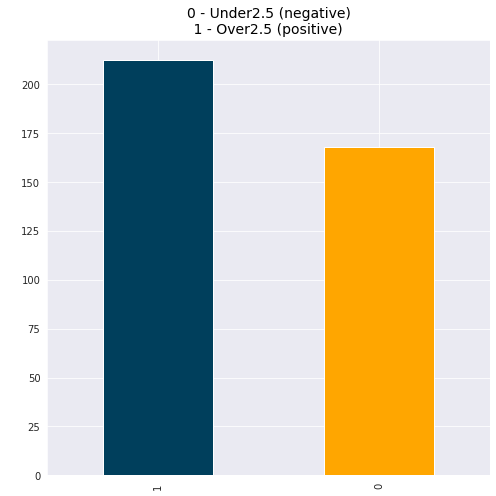

In [508]:
#Number of occurences in target variable
target=pd.Series(target)

plt.figure(figsize=(7,7))
colors = ['#003f5c', '#ffa600']
target.value_counts().plot.bar(ylabel=' ',color=colors)
plt.title(f'0 - Under2.5 (negative)\n 1 - Over2.5 (positive) ', size=14, c='black')
plt.tight_layout()
plt.show() 

In [509]:
print(f'Relative Frequency of Over 2.5:  {target.mean()*100}\nReleativeFrequency Under 2.5:   {(100-(target.mean()*100))}')

Relative Frequency of Over 2.5:  55.78947368421052
ReleativeFrequency Under 2.5:   44.21052631578948


>Looking at the frequencies of the target variable we can state that during the championship related to year 2021/2022 we would have a 56% empirical probability of guessing the Over 2.5 outcome by choosing at random

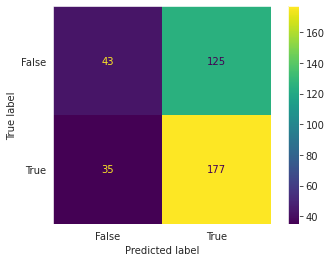

In [510]:
#Misclassification Error
confusion_matrix = metrics.confusion_matrix(target, predB365)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.grid(b=None)
plt.show()

In [511]:
#Precision score over 2.5 and under 2.5
precision_positive = metrics.precision_score(target, predB365, pos_label=1)
precision_negative = metrics.precision_score(target, predB365, pos_label=0)
print(f"Precision score over2.5:  {precision_positive}\nPrecision score under2.5:  {precision_negative}\nAccuracy:  {accuracy}")

Precision score over2.5:  0.5860927152317881
Precision score under2.5:  0.5512820512820513
Accuracy:  0.5789473684210527


>Instead using  the odds offered by bookmaker B365 to choose the event Over 2.5 If we had played according to the odds  we would have guessed the 58% of the bets

>To be competitive i should do better than those metrics


##*Creating feature variables*

> First of all I have to create the variables that i will use to the analysis,then I am going to take a look at the variables to understand better the problem 



In [512]:
data.head(3)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,target,predB365
0,I1,21/08/2021,17:30,Inter,Genoa,4,0,H,2,0,H,17,11,8,5,18,7,8,2,1,2,0,0,1.33,5.25,9.00,1.33,5.5,8.50,1.37,5.25,8.0,1.36,5.37,9.65,1.35,5.0,9.00,1.30,5.00,10.0,1.40,5.50,10.00,1.35,5.16,8.94,1.66,2.20,1.67,2.33,1.71,2.38,1.63,2.28,-1.25,1.75,2.05,1.81,2.11,1.87,2.13,1.80,2.07,1.28,5.75,11.00,1.30,5.25,10.50,1.30,5.25,11.00,1.31,5.78,11.37,1.29,5.5,11.00,1.25,5.75,11.5,1.35,6.25,12.75,1.29,5.58,10.84,1.61,2.3,1.61,2.45,1.70,2.55,1.62,2.32,-1.5,1.88,2.05,1.89,2.03,1.96,2.09,1.86,2.01,1,1
1,I1,21/08/2021,17:30,Verona,Sassuolo,2,3,A,0,1,A,12,15,4,8,11,12,7,4,3,2,1,0,2.62,3.30,2.62,2.55,3.5,2.70,2.60,3.45,2.7,2.66,3.55,2.75,2.60,3.4,2.70,2.63,3.25,2.7,2.74,3.55,2.79,2.61,3.43,2.69,1.90,2.03,1.87,2.04,1.90,2.06,1.85,1.98,0.00,1.93,2.00,1.93,1.99,1.95,2.01,1.91,1.97,2.50,3.40,2.75,2.55,3.50,2.70,2.55,3.35,2.75,2.64,3.43,2.84,2.50,3.4,2.80,2.55,3.25,2.8,2.75,3.50,2.90,2.57,3.40,2.76,1.80,2.0,1.81,2.10,1.87,2.17,1.80,2.03,0.0,1.88,2.05,1.89,2.04,2.00,2.07,1.86,2.02,1,1
2,I1,21/08/2021,19:45,Empoli,Lazio,1,3,A,1,3,A,16,8,5,5,13,10,5,3,2,1,0,0,4.60,4.00,1.70,4.60,3.9,1.75,4.60,3.95,1.7,5.01,4.02,1.74,4.75,3.7,1.75,5.00,3.70,1.7,5.01,4.03,1.79,4.71,3.90,1.73,1.72,2.10,1.75,2.19,1.78,2.21,1.72,2.15,0.75,1.98,1.95,1.97,1.94,2.00,2.00,1.93,1.93,3.75,3.80,1.90,4.00,3.75,1.87,3.65,3.75,1.95,4.11,3.84,1.93,4.00,3.7,1.88,4.00,3.60,1.9,4.50,3.94,2.00,4.06,3.77,1.88,1.66,2.2,1.69,2.29,1.74,2.39,1.68,2.21,0.5,2.00,1.93,2.00,1.93,2.06,1.95,1.99,1.88,1,1


In [513]:
#Reversing columns from the most recent to the least recent
reversedata = data.loc[::-1]
reversedata=reversedata.reset_index()
reversedata=reversedata.drop('index',axis=1)
reversedata.head(3)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,target,predB365
0,I1,22/05/2022,20:00,Venezia,Cagliari,0,0,D,0,0,D,7,31,1,7,6,19,6,11,0,3,0,0,4.5,3.80,1.72,4.75,3.9,1.70,4.60,3.95,1.73,4.83,4.25,1.70,4.5,4.0,1.70,4.6,3.80,1.73,4.86,4.3,1.76,4.68,4.05,1.72,1.72,2.10,1.74,2.17,1.80,2.19,1.73,2.12,0.75,1.96,1.94,2.01,1.89,2.01,1.98,1.96,1.90,5.25,4.2,1.57,5.25,4.00,1.63,5.25,4.10,1.63,5.66,4.16,1.63,5.50,4.00,1.55,5.25,4.0,1.62,5.87,4.30,1.70,5.32,4.08,1.63,1.66,2.20,1.72,2.21,1.81,2.28,1.70,2.16,1.00,1.87,2.03,1.85,2.06,1.97,2.22,1.79,2.09,0,1
1,I1,22/05/2022,20:00,Salernitana,Udinese,0,4,A,0,3,A,25,19,10,11,11,12,7,1,1,1,0,0,1.7,4.00,4.75,1.71,4.0,4.50,1.63,4.20,4.90,1.69,4.34,4.79,1.7,4.0,4.50,1.7,3.90,4.80,1.76,4.4,4.90,1.70,4.17,4.60,1.61,2.30,1.61,2.42,1.66,2.43,1.61,2.34,-0.75,1.93,1.97,1.88,2.02,1.98,2.02,1.90,1.97,1.90,4.0,3.60,1.90,3.75,3.75,1.83,3.95,4.00,1.89,4.01,4.07,1.85,4.00,3.70,1.87,3.7,4.00,1.95,4.08,4.18,1.89,3.87,3.90,1.57,2.37,1.61,2.46,1.67,2.46,1.60,2.35,-0.50,1.89,2.01,1.89,2.04,1.93,2.04,1.89,1.99,1,1
2,I1,22/05/2022,17:00,Sassuolo,Milan,0,3,A,0,3,A,15,18,3,12,8,13,3,7,2,1,0,0,6.5,4.75,1.45,6.00,4.8,1.47,7.75,4.20,1.47,6.84,5.00,1.46,7.0,4.6,1.42,7.5,4.75,1.40,7.76,5.2,1.50,6.63,4.87,1.46,1.50,2.62,1.46,2.84,1.48,2.86,1.45,2.76,1.25,1.90,2.00,1.94,1.96,1.96,2.02,1.90,1.96,7.00,5.0,1.40,6.75,4.80,1.43,7.50,4.80,1.43,7.62,5.12,1.43,7.50,4.75,1.40,7.00,5.0,1.40,7.80,5.20,1.48,7.21,4.95,1.43,1.50,2.62,1.49,2.75,1.53,2.75,1.49,2.63,1.25,2.04,1.86,2.06,1.87,2.06,2.01,1.98,1.89,1,1


In [514]:
features=reversedata[['Date',	'Time',	'HomeTeam',	'AwayTeam',	'FTHG',	'FTAG','HST','AST','B365>2.5','target','predB365']]
features.head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,B365>2.5,target,predB365
0,22/05/2022,20:00,Venezia,Cagliari,0,0,1,7,1.72,0,1
1,22/05/2022,20:00,Salernitana,Udinese,0,4,10,11,1.61,1,1
2,22/05/2022,17:00,Sassuolo,Milan,0,3,3,12,1.50,1,1
3,22/05/2022,17:00,Inter,Sampdoria,3,0,12,3,1.28,1,1
4,22/05/2022,11:30,Spezia,Napoli,0,3,4,4,1.44,1,1
5,21/05/2022,19:45,Lazio,Verona,3,3,7,7,1.53,1,1
6,21/05/2022,19:45,Fiorentina,Juventus,2,0,4,0,1.66,0,1
7,21/05/2022,19:45,Atalanta,Empoli,0,1,10,3,1.25,0,1
8,21/05/2022,16:15,Genoa,Bologna,0,1,5,4,1.66,0,1
9,20/05/2022,19:45,Torino,Roma,0,3,2,6,1.72,1,1


In [515]:
n_previous_matches=5

In [516]:
#Code to compute avg Goal Scored and Conceded
#new columns
navgShotHome=[]
navgShotAway=[]
navgGoalHome=[]
navgGoalConcededHome=[]
navgGoalAway=[]
navgGoalConcededAway=[]
avgGoalHome=[]
avgGoalConcededHome=[]
avgGoalAway=[]
avgGoalConcededAway=[]

for idx in reversed(range(len(features)-n_previous_matches*10)):
    teamhome=features['HomeTeam'].iloc[idx]
    teamaway=features['AwayTeam'].iloc[idx]
    auxdf=features.iloc[idx:,:].copy()

  
      #Home Team Goal Scored from th last n matches
    obs=auxdf.loc[((auxdf['HomeTeam'].str.contains(teamhome) ) == True )|( (auxdf['AwayTeam'].str.contains(teamhome)) == True)].iloc[1:n_previous_matches+1]

    sumgolscoredth=obs[obs['HomeTeam']==teamhome]['FTHG'].sum()
    countgolscoredth=obs[obs['HomeTeam']==teamhome]['FTHG'].count()

    sumgolscoredth=obs[obs['AwayTeam']==teamhome]['FTAG'].sum()+sumgolscoredth
    countgolscoredth=obs[obs['AwayTeam']==teamhome]['FTAG'].count()+countgolscoredth

    navgGoalHome.append(sumgolscoredth/countgolscoredth)
    
    #Shot home
    sumgolscoredth=obs[obs['HomeTeam']==teamhome]['HST'].sum()
    countgolscoredth=obs[obs['HomeTeam']==teamhome]['HST'].count()

    sumgolscoredth=obs[obs['AwayTeam']==teamhome]['AST'].sum()+sumgolscoredth
    countgolscoredth=obs[obs['AwayTeam']==teamhome]['AST'].count()+countgolscoredth

    navgShotHome.append(sumgolscoredth/countgolscoredth)
    
    #Home Team Goal Conceded from th last n matches
    
    sumgolconcededth=obs[obs['HomeTeam']==teamhome]['FTAG'].sum()
    countgolconcededth=obs[obs['HomeTeam']==teamhome]['FTAG'].count()

    sumgolconcededth=obs[obs['AwayTeam']==teamhome]['FTHG'].sum()+sumgolconcededth
    countgolconcededth=obs[obs['AwayTeam']==teamhome]['FTHG'].count() + countgolconcededth
    navgGoalConcededHome.append(sumgolconcededth/countgolconcededth)
##-------------------------------------------------------------------------------------------
      #Away Team Goal Scored from th last n matches
    obs=auxdf.loc[((auxdf['HomeTeam'].str.contains(teamaway) ) == True )|( (auxdf['AwayTeam'].str.contains(teamaway)) == True)].iloc[1:n_previous_matches+1]

    sumgolscoredta=obs[obs['HomeTeam']==teamaway]['FTHG'].sum()
    countgolscoredta=obs[obs['HomeTeam']==teamaway]['FTHG'].count()
    sumgolscoredta=obs[obs['AwayTeam']==teamaway]['FTAG'].sum()+sumgolscoredta
    countgolscoredta=obs[obs['AwayTeam']==teamaway]['FTAG'].count()+countgolscoredta

    navgGoalAway.append(sumgolscoredta/countgolscoredta)

    #Shot Away
    sumgolscoredth=obs[obs['HomeTeam']==teamaway]['HST'].sum()
    countgolscoredth=obs[obs['HomeTeam']==teamaway]['HST'].count()

    sumgolscoredth=obs[obs['AwayTeam']==teamaway]['AST'].sum()+sumgolscoredth
    countgolscoredth=obs[obs['AwayTeam']==teamaway]['AST'].count()+countgolscoredth

    navgShotAway.append(sumgolscoredth/countgolscoredth)
      #Away Team Goal Conceded from th last n matches
    
    sumgolconcededta=obs[obs['HomeTeam']==teamaway]['FTAG'].sum()
    countgolconcededta=obs[obs['HomeTeam']==teamaway]['FTAG'].count()

    sumgolconcededta=obs[obs['AwayTeam']==teamaway]['FTHG'].sum()+sumgolconcededta
    countgolconcededta=obs[obs['AwayTeam']==teamaway]['FTHG'].count()+countgolconcededta

    navgGoalConcededAway.append(sumgolconcededta/countgolconcededta)

#---------------------------------------------------------------------------------------------
      #Total Goal Home

      #Home Team Goal Scored from th total  matches
    obs=auxdf.loc[((auxdf['HomeTeam'].str.contains(teamhome) ) == True )|( (auxdf['AwayTeam'].str.contains(teamhome)) == True)].iloc[1:]

    sumgolscoredth=obs[obs['HomeTeam']==teamhome]['FTHG'].sum()
    countgolscoredth=obs[obs['HomeTeam']==teamhome]['FTHG'].count()

    sumgolscoredth=obs[obs['AwayTeam']==teamhome]['FTAG'].sum()+sumgolscoredth
    countgolscoredth=obs[obs['AwayTeam']==teamhome]['FTAG'].count()+countgolscoredth

    avgGoalHome.append(sumgolscoredth/countgolscoredth)

      #Home Team Goal Conceded from th total  matches
    
    sumgolconcededth=obs[obs['HomeTeam']==teamhome]['FTAG'].sum()
    countgolconcededth=obs[obs['HomeTeam']==teamhome]['FTAG'].count()

    sumgolconcededth=obs[obs['AwayTeam']==teamhome]['FTHG'].sum()+sumgolconcededth
    countgolconcededth=obs[obs['AwayTeam']==teamhome]['FTHG'].count()+countgolconcededth
    avgGoalConcededHome.append(sumgolconcededth/countgolconcededth)
##-------------------------------------------------------------------------------------------
      #Away Team Goal Scored from th total matches
    obs=auxdf.loc[((auxdf['HomeTeam'].str.contains(teamaway) ) == True )|( (auxdf['AwayTeam'].str.contains(teamaway)) == True)].iloc[1:]

    sumgolscoredta=obs[obs['HomeTeam']==teamaway]['FTHG'].sum()
    countgolscoredta=obs[obs['HomeTeam']==teamaway]['FTHG'].count()

    sumgolscoredta=obs[obs['AwayTeam']==teamaway]['FTAG'].sum()+sumgolscoredta
    countgolscoredta=obs[obs['AwayTeam']==teamaway]['FTAG'].count()+countgolscoredta
    avgGoalAway.append(sumgolscoredta/countgolscoredta)

      #Away Team Goal Conceded from the total  matches
    
    sumgolconcededta=obs[obs['HomeTeam']==teamaway]['FTAG'].sum()
    countgolconcededta=obs[obs['HomeTeam']==teamaway]['FTAG'].count()

    sumgolconcededta=obs[obs['AwayTeam']==teamaway]['FTHG'].sum()+sumgolconcededta
    countgolconcededta=obs[obs['AwayTeam']==teamaway]['FTHG'].count()+countgolconcededta

    avgGoalConcededAway.append(sumgolconcededta/countgolconcededta)
      


In [517]:
info_dict={
'navgGoalHome':navgGoalHome,
'navgGoalConcededHome':navgGoalConcededHome,
'navgGoalAway':navgGoalAway,
'navgGoalConcededAway':navgGoalConcededAway,
'avgGoalHome':avgGoalHome,
'avgGoalConcededHome':avgGoalConcededHome,
'avgGoalAway':avgGoalAway,
'avgGoalConcededAway':avgGoalConcededAway,
'avgshothome':navgShotHome,
'navgShotAway':navgShotAway
}

In [518]:
info_df=pd.DataFrame(info_dict)

In [519]:
info_df.shape

(330, 10)

In [520]:
info_df.head(3)

,navgGoalHome,navgGoalConcededHome,navgGoalAway,navgGoalConcededAway,avgGoalHome,avgGoalConcededHome,avgGoalAway,avgGoalConcededAway,avgshothome,navgShotAway
0,1.4,2.6,2.0,0.4,1.4,2.6,2.0,0.4,4.2,3.8
1,3.6,1.0,1.2,0.8,3.6,1.0,1.2,0.8,7.0,3.6
2,1.4,2.4,1.6,2.2,1.4,2.4,1.6,2.2,4.0,3.4


In [521]:
#reversing row info
info_df = info_df.loc[::-1]
info_df=info_df.reset_index()
info_df=info_df.drop('index',axis=1)
info_df.head(3)

,navgGoalHome,navgGoalConcededHome,navgGoalAway,navgGoalConcededAway,avgGoalHome,avgGoalConcededHome,avgGoalAway,avgGoalConcededAway,avgshothome,navgShotAway
0,1.6,2.2,0.8,1.4,0.918919,1.864865,0.918919,1.837838,4.0,3.8
1,1.4,1.0,2.0,1.6,0.891892,2.000000,1.540541,1.567568,5.6,5.6
2,1.2,2.2,2.0,0.4,1.729730,1.702703,1.783784,0.837838,5.2,5.8


In [522]:
#Merging features with info_df
features=pd.concat([features,info_df],axis=1, join='inner')
features.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,B365>2.5,target,predB365,navgGoalHome,navgGoalConcededHome,navgGoalAway,navgGoalConcededAway,avgGoalHome,avgGoalConcededHome,avgGoalAway,avgGoalConcededAway,avgshothome,navgShotAway
0,22/05/2022,20:00,Venezia,Cagliari,0,0,1,7,1.72,0,1,1.6,2.2,0.8,1.4,0.918919,1.864865,0.918919,1.837838,4.0,3.8
1,22/05/2022,20:00,Salernitana,Udinese,0,4,10,11,1.61,1,1,1.4,1.0,2.0,1.6,0.891892,2.000000,1.540541,1.567568,5.6,5.6
2,22/05/2022,17:00,Sassuolo,Milan,0,3,3,12,1.50,1,1,1.2,2.2,2.0,0.4,1.729730,1.702703,1.783784,0.837838,5.2,5.8
3,22/05/2022,17:00,Inter,Sampdoria,3,0,12,3,1.28,1,1,2.6,1.4,1.4,1.2,2.189189,0.864865,1.243243,1.621622,7.4,2.6
4,22/05/2022,11:30,Spezia,Napoli,0,3,4,4,1.44,1,1,1.8,2.8,2.6,1.0,1.108108,1.837838,1.918919,0.837838,2.8,5.8






> I will treat hour feature as numeric but first i have to remove two points 

In [523]:
features['Time'] = features['Time'].str.replace(':','.')

In [524]:
features["Time"] = pd.to_numeric(features["Time"])

## *Verifying Nan values*

In [525]:
features.isna().sum()

Date                    0
Time                    0
HomeTeam                0
AwayTeam                0
FTHG                    0
FTAG                    0
HST                     0
AST                     0
B365>2.5                1
target                  0
predB365                0
navgGoalHome            0
navgGoalConcededHome    0
navgGoalAway            0
navgGoalConcededAway    0
avgGoalHome             0
avgGoalConcededHome     0
avgGoalAway             0
avgGoalConcededAway     0
avgshothome             0
navgShotAway            0
dtype: int64

> Since we have only one Nan value i can delete the whole rows 

In [526]:
features=features.dropna()

## *Distributions of the features*

> To analyze the features created before i will look at the empirical distributions o

In [527]:
features.columns

Index(['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST',
       'B365>2.5', 'target', 'predB365', 'navgGoalHome',
       'navgGoalConcededHome', 'navgGoalAway', 'navgGoalConcededAway',
       'avgGoalHome', 'avgGoalConcededHome', 'avgGoalAway',
       'avgGoalConcededAway', 'avgshothome', 'navgShotAway'],
      dtype='object')

In [528]:
lis=[features.Time[data['target']==1], features.Time[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,24])
fig.update_layout(title_text='Distplot with Normal Distribution : navgGoalHome')
fig.show()

In [529]:
lis=[features.navgGoalHome[data['target']==1], features.navgGoalHome[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution : navgGoalHome')
fig.show()

In [530]:
lis=[features.navgGoalConcededHome[data['target']==1], features.navgGoalConcededHome[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution : navgGoalConcededHome')
fig.show()

In [531]:

lis=[features.navgGoalAway[data['target']==1], features.navgGoalAway[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution: navggoalaway')
fig.show()

In [532]:
lis=[features.navgGoalConcededAway[data['target']==1], features.navgGoalConcededAway[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution  navgGoalConcededAway')
fig.show()

In [533]:

lis=[features.avgGoalHome[data['target']==1], features.avgGoalHome[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution  avgGoalHome')
fig.show()

In [534]:

lis=[features.avgGoalConcededHome[data['target']==1], features.avgGoalConcededHome[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution  avgGoalConcededHome')
fig.show()

In [535]:


lis=[features.avgGoalAway[data['target']==1], features.avgGoalAway[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution  avgGoalAway ')
fig.show()

In [536]:
lis=[features.avgGoalConcededAway[data['target']==1], features.avgGoalConcededAway[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,5])
fig.update_layout(title_text='Distplot with Normal Distribution  navgGoalConcededAway ')
fig.show()

In [537]:
lis=[features.avgshothome[data['target']==1], features.avgshothome[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,20])
fig.update_layout(title_text='Distplot with Normal Distribution  avgshothome ')
fig.show()

In [538]:
lis=[features.navgShotAway[data['target']==1], features.navgShotAway[data['target']==0]]
group_labels=['over 2.5','under 2.5']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,20])
fig.update_layout(title_text='Distplot with Normal Distribution  navgShotAway ')
fig.show()

>From those distribution snothing interesting come out ,we can observe that distributions for related to target equal to 1 are very similar to distributions for target equal to 0



> Maybe i should take a look at the correlation matrix



In [539]:
features.columns

Index(['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST',
       'B365>2.5', 'target', 'predB365', 'navgGoalHome',
       'navgGoalConcededHome', 'navgGoalAway', 'navgGoalConcededAway',
       'avgGoalHome', 'avgGoalConcededHome', 'avgGoalAway',
       'avgGoalConcededAway', 'avgshothome', 'navgShotAway'],
      dtype='object')

In [540]:
corr_matrix=features[['target', 'navgGoalHome',
       'navgGoalConcededHome', 'navgGoalAway', 'navgGoalConcededAway',
       'avgGoalHome', 'avgGoalConcededHome', 'avgGoalAway',
       'avgGoalConcededAway', 'avgshothome', 'navgShotAway']].corr()


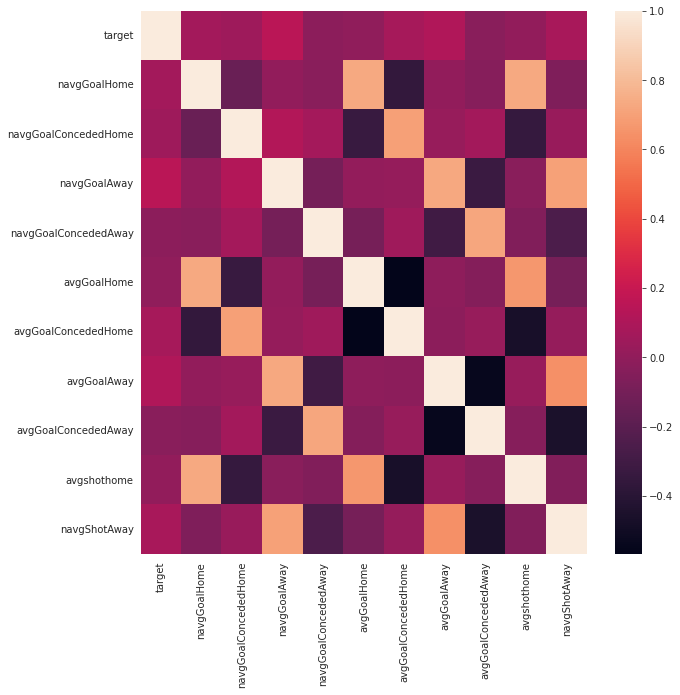

In [541]:
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr_matrix,ax=ax)



> From the Correlation Matrix we can observe some info like:
- avgGoalHome and navgGoalHome have a positive correlation index
- avgGoalConcededHome and navgGoalHome have a negative correlation index
and so on...

>Those information are obvious beacuse navg and avg are generated from the same variables

#Model Training

>At this point we can try to fit some model ,but from the analysis done before i don't guess that the model will able to return a good output

>Models that  i am going to use :
>
> - GaussianNB
> 
> - KNeighborsClassifier
>
> - LogisticRegression
>
> - RandomForestClassifier
> 
> - SVC
>
> - XGBoost

> I will use K-fold Cross Validation to test the accuracy of the model

In [542]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

In [543]:
Y=features['target']
Yb=features['predB365']
X=features.drop(['Date',  'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'target','predB365','HST','AST'],axis=1)

In [544]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)
X_train.columns

Index(['Time', 'B365>2.5', 'navgGoalHome', 'navgGoalConcededHome',
       'navgGoalAway', 'navgGoalConcededAway', 'avgGoalHome',
       'avgGoalConcededHome', 'avgGoalAway', 'avgGoalConcededAway',
       'avgshothome', 'navgShotAway'],
      dtype='object')

In [545]:
def clf_metrics(classifier,model_name):
    classifier=classifier.fit(X_train,y_train)
    #Precision score over 2.5 and under 2.5
    y_pred=pd.Series(classifier.predict(X_test))
    precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)*100
    precision_negative = metrics.precision_score(y_test, y_pred, pos_label=0)*100
    accuracy=metrics.accuracy_score(y_test, y_pred)*100
    print(model_name)
    print('\n')
    print(f"Precision score over2.5:  {precision_positive}\nPrecision score under2.5:  {precision_negative}\nAccuracy:  {accuracy}")


In [546]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
    #Precision score over 2.5 and under 2.5
    y_pred=pd.Series(classifier.predict(X_test))
    precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)
    precision_negative = metrics.precision_score(y_test, y_pred, pos_label=0)
    accuracy=metrics.accuracy_score(y_test, y_pred)*100
    print(f"Precision score over2.5:  {precision_positive}\nPrecision score under2.5:  {precision_negative}\nAccuracy:  {accuracy}")

In [547]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
clf_metrics(gnb,'GaussianNB')

[0.38636364 0.43181818 0.52272727 0.43181818 0.52272727]
0.4590909090909091
GaussianNB


Precision score over2.5:  56.00000000000001
Precision score under2.5:  47.45762711864407
Accuracy:  51.37614678899083


In [548]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
clf_metrics(knn,'K-Nearest Neighbors')

[0.52272727 0.40909091 0.56818182 0.52272727 0.40909091]
0.48636363636363633
K-Nearest Neighbors


Precision score over2.5:  58.333333333333336
Precision score under2.5:  49.18032786885246
Accuracy:  53.21100917431193


In [549]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
clf_metrics(lr,'LogisticRegression')

[0.5        0.5        0.52272727 0.5        0.61363636]
0.5272727272727272
LogisticRegression


Precision score over2.5:  59.61538461538461
Precision score under2.5:  50.877192982456144
Accuracy:  55.04587155963303


In [550]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
clf_metrics(rf,'RandomForest')

[0.38636364 0.29545455 0.45454545 0.36363636 0.38636364]
0.37727272727272726
RandomForest


Precision score over2.5:  66.66666666666666
Precision score under2.5:  55.73770491803278
Accuracy:  60.550458715596335


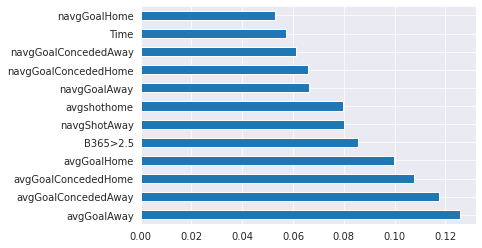

In [551]:
rf_fit = rf.fit(X_train, y_train)
feat_importances = pd.Series(rf_fit.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [552]:
# fit model no training data
xgb = XGBClassifier()
cv=cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
clf_metrics(xgb,'Extreme Gradient Boosting')

[0.43181818 0.47727273 0.43181818 0.40909091 0.43181818]
0.4363636363636364
Extreme Gradient Boosting


Precision score over2.5:  63.63636363636363
Precision score under2.5:  52.307692307692314
Accuracy:  56.88073394495413


In [553]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
clf_metrics(svc,'Support Vector Classifier')

[0.47727273 0.45454545 0.45454545 0.52272727 0.52272727]
0.48636363636363633
Support Vector Classifier


Precision score over2.5:  54.6875
Precision score under2.5:  46.666666666666664
Accuracy:  51.37614678899083


In [554]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [555]:
cv = cross_val_score(voting_clf,X,Y,cv=5)
print(cv)
print(cv.mean())
clf_metrics(voting_clf,'Soft Voting Classifier')

[0.54545455 0.59090909 0.48484848 0.53030303 0.47692308]
0.5256876456876457
Soft Voting Classifier


Precision score over2.5:  63.04347826086957
Precision score under2.5:  52.38095238095239
Accuracy:  56.88073394495413


#Model Tuned Performance
>After getting the baselines, let's see if we can improve the most accuracy baseline model,i tuned only one model due to time issues but surely will be useful to see how metrics improve tuning different models

|Model|Baseline|||Tuned|||
|-----|--------|------------------------|------------------------|--------|-----------------------|------------------------|
|Model|Accuracy|Precision Score Over 2.5|Precision Score Under 2.5|Accuracy|Precision Score Over 2.5|Precision Score Under 2.5||||
|Naive Bayes| 51.37%| 56%|47.45%||||
|K Nearest Neighbor| 53.21%|58.33%|49.18%||||
|Logistic Regression| 55%| 59.61%|50.87%||||
|Random Forest| 60.55%| 66.66%|55.73%|60.55%|68.18%|55.38%|
|Xtreme Gradient Boosting| 56.88%| 63.63%|52.30%|
|Support Vector Classifier| 51.37%| 54.68%|46.66%|
|Soft Voting| 56.88%| 65.90%|53.84%|






In [556]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 


In [572]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 
'''
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

'''

'''
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.4590909090909091
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
Precision score over2.5:  0.5925925925925926
Precision score under2.5:  0.509090909090909
Accuracy:  55.04587155963303

'''

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.4590909090909091
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
Precision score over2.5:  0.5925925925925926
Precision score under2.5:  0.509090909090909
Accuracy:  55.04587155963303


In [573]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [50,100,150,200],
               'criterion':['gini','entropy'],
                                  'bootstrap': [False],
                                  'max_depth': [5, 10, 15],
                                  'max_features': ['sqrt'],
                                  'min_samples_leaf': [1,2,3],
                                  'min_samples_split': [5,6]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

'''Fitting 5 folds for each of 144 candidates, totalling 720 fits
Random Forest
Best Score: 0.46818181818181814
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}
Precision score over2.5:  0.6818181818181818
Precision score under2.5:  0.5538461538461539
Accuracy:  60.550458715596335
'''

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Random Forest
Best Score: 0.46818181818181814
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}
Precision score over2.5:  0.6818181818181818
Precision score under2.5:  0.5538461538461539
Accuracy:  60.550458715596335


In [596]:
best_clf_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [597]:
trf = RandomForestClassifier(random_state = 1)
trf.set_params(**best_clf_rf.best_params_)
tuned_rf = trf.fit(X_train,y_train)

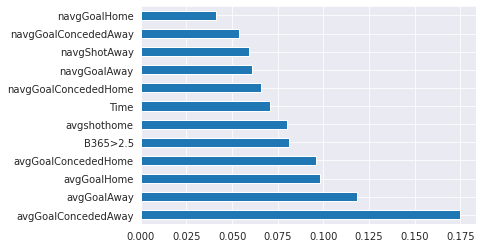

In [598]:

feat_importances = pd.Series(tuned_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')

#Prepare Data to Conclusion

In [574]:
ind=y_test.index
compare_df=features[['target','predB365']].loc[ind]

In [575]:
target=compare_df['target']

In [576]:
predB365=compare_df['predB365']

In [577]:
predrf=rf_fit.predict(X_test)

In [599]:
bestpredrf=tuned_rf.predict(X_test)

#Conclusion

> Choosing at random I would had an empirical probability of guessing the event Over 2.5 of 54.12% in the test set

|Model|Accuracy|Precision Score Over 2.5|Precision Score Under 2.5|
|-----|--------|------------------------|-------------------------|
|Bookmaker|61.46%|60.00%|66.66%|
|Random Forest| 60.55%| 66.66%|55.73%|
|Tuned Randome Forest|60.55%|68.18%|55.38%|


> Using the Tuned Random Forest when the classifier predict that the event will end with a number of goal greater than 2 the empirical probability of guessing the event is of 68.18%

>Instead if  I had used the odds of the bookmaker with more or less the same accuracy i would had an empirical pobability of 60%

>We can conclude that the model has  better performance compared to using the other strategy,but i don't use this model to bet on Event Over2.5,since there are some considerations to be made:

> - we have used to few data to try to predict an output so complex
>
> - Surely leading more deep analysis we could find out variables more useful like : performance players and so on...
>
> - We should also use data from other years to validate the model

In [579]:
#Relative Frequencies target
print(f'Relative Frequency of Over 2.5:  {target.mean()*100}\nReleativeFrequency Under 2.5:   {(100-(target.mean()*100))}')

Relative Frequency of Over 2.5:  54.12844036697248
ReleativeFrequency Under 2.5:   45.87155963302752


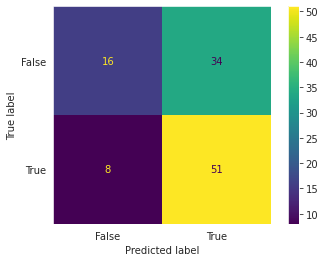

In [580]:
#Misclassification Error PredB365
confusion_matrix = metrics.confusion_matrix(target, predB365)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.grid(b=None)
plt.show()

In [581]:
#Precision score over 2.5 and under 2.5 PredB365
precision_positive = metrics.precision_score(target, predB365, pos_label=1)
precision_negative = metrics.precision_score(target, predB365, pos_label=0)
accuracy=metrics.accuracy_score(target,predB365)
print(f"Precision score over2.5:  {precision_positive}\nPrecision score under2.5:  {precision_negative}\nAccuracy:  {accuracy}")

Precision score over2.5:  0.6
Precision score under2.5:  0.6666666666666666
Accuracy:  0.6146788990825688


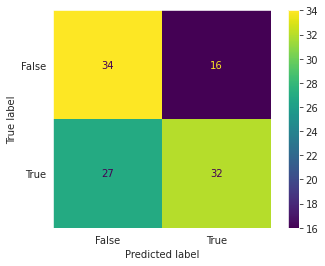

In [582]:
#Misclassification Error Random Forest
confusion_matrix = metrics.confusion_matrix(y_test, predrf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.grid(b=None)
plt.show()

In [583]:
#Precision score over 2.5 and under 2.5 RandomForest
precision_positive = metrics.precision_score(target, predrf, pos_label=1)
precision_negative = metrics.precision_score(target, predrf, pos_label=0)
accuracy=metrics.accuracy_score(target,predrf)
print(f"Precision score over2.5:  {precision_positive}\nPrecision score under2.5:  {precision_negative}\nAccuracy:  {accuracy}")

Precision score over2.5:  0.6666666666666666
Precision score under2.5:  0.5573770491803278
Accuracy:  0.6055045871559633


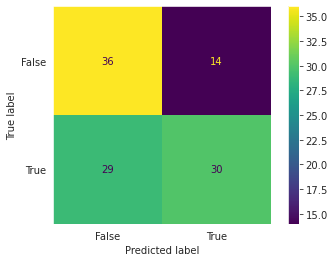

In [600]:
#Misclassification Error Best Random Forest
confusion_matrix = metrics.confusion_matrix(y_test, bestpredrf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.grid(b=None)
plt.show()

In [601]:
#Precision score over 2.5 and under 2.5  Best RandomForest
precision_positive = metrics.precision_score(target, bestpredrf, pos_label=1)
precision_negative = metrics.precision_score(target, bestpredrf, pos_label=0)
accuracy=metrics.accuracy_score(target,predrf)
print(f"Precision score over2.5:  {precision_positive}\nPrecision score under2.5:  {precision_negative}\nAccuracy:  {accuracy}")

Precision score over2.5:  0.6818181818181818
Precision score under2.5:  0.5538461538461539
Accuracy:  0.6055045871559633
